In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Q1. I want to know emplyee satisfaction level in every department, with their corresponding salary bracket and find out if employees with high salary were having high satisfaction level

Q2. What is the picture of satsifaction level among the employees those were promoted in last 5 yrs to those who were not, with their respective salary brackets

In [2]:
##Improting output data from Homework

hrdb = pd.read_csv("outputdata3.csv")
hrdb.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,200.149743,3.489166,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.647584,1.452451,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,197.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

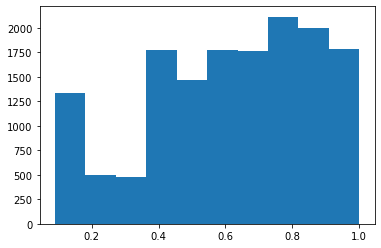

In [3]:
##Plotting a histogram of 'satisfaction_level' to see the spread of the data as avergae value is not enough 
##to locate problem area

plt.hist(data = hrdb,x = 'satisfaction_level', bins=10)

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

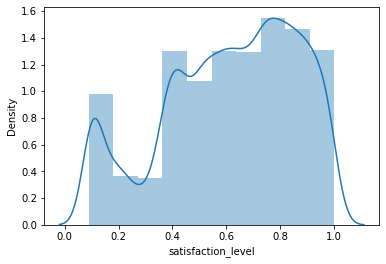

In [4]:
## Adding density to the histogram

sns.distplot(hrdb.satisfaction_level, bins=10, kde=True)

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

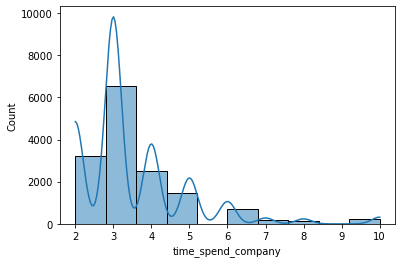

In [5]:
##Investigating spread of Time spent in company by an employee before leaving

sns.histplot(data = hrdb,x = 'time_spend_company', bins=10, kde=True)

<AxesSubplot:xlabel='satisfaction_level', ylabel='department'>

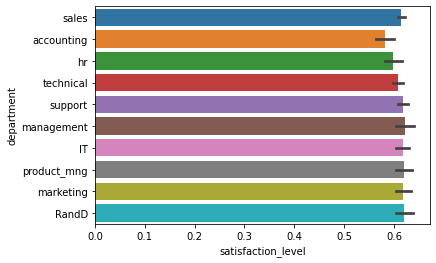

In [6]:
#Average Satisfaction level by Department

sns.barplot(x='satisfaction_level', y='department', data=hrdb, orient='h')

<AxesSubplot:xlabel='satisfaction_level', ylabel='average_montly_hours'>

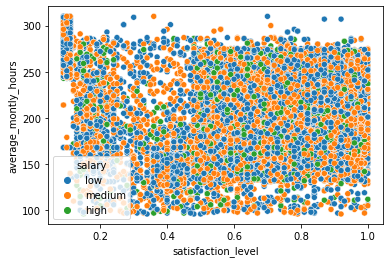

In [7]:
#Investigating if there is any relationship between Satisfaction Level and Average Monthly Hours

sns.scatterplot(x="satisfaction_level", y="average_montly_hours", hue="salary", data=hrdb)

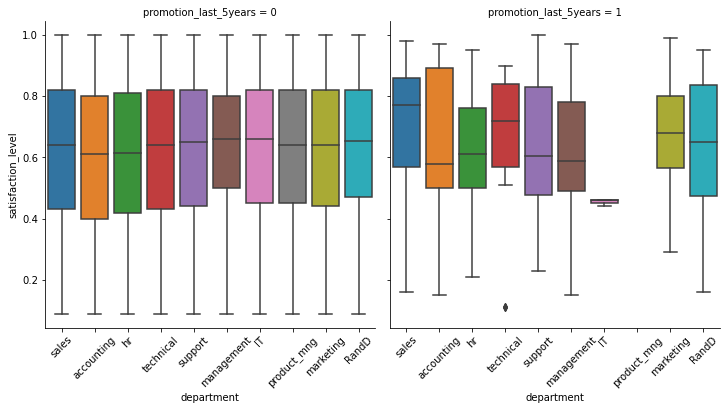

In [8]:
##Trying to narrow down the problemm area if 'lack of promotion' is a cause of attrition, department wise

ax = sns.catplot(x ='department', y = 'satisfaction_level', col='promotion_last_5years', kind='box', data=hrdb)
ax.set_xticklabels(rotation=45)

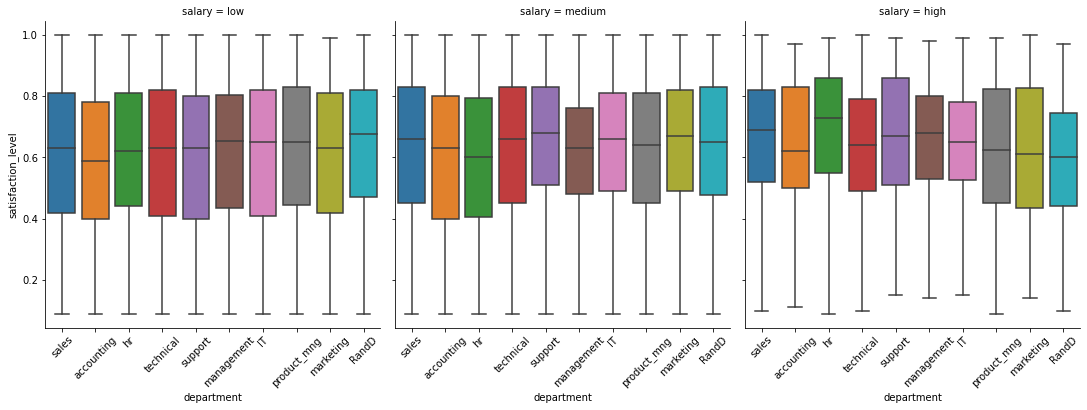

In [9]:
##Trying to narrow down the problemm area if 'salary' is a cause of attrition, department wise

ax = sns.catplot(x ='department', y = 'satisfaction_level', col='salary', kind='box', data=hrdb)
ax.set_xticklabels(rotation=45)

As we saw from these visualizations, histogram of ‘satisfaction level’ is not normally distributed but spread almost evenly. Histogram of ‘time spend’ is skewed right, which means people are leaving company early. 
The horizontal bar plot shows that average satisfaction level across all department is almost same, around 0.6, which is not helping to narrow down the problem area. There is no relationship between Satisfaction Level and Average Monthly Hours, as evident from the scatter plot.

So, we took help of box plots of ‘satisfaction level’ for all departments, separate for people promoted in last 5 years and those who are not. And then used box plots for departments, separated as per salary level. The box plot with lowest width and higher median values are the departments with happy people. As per the plots, none of the departments have box containing values less than 0.4, so there are unhappy people in all the departments, irrespective of their salary or promotion. People from Sales and HR have median values more than 0.6 when they have higher salaries. 

However, each department needs to study their respective data and investigate further. 
